# R5 Qualitative Bankruptcy
1. Read the dataset and understand the features and target variable. 4 points
2. Encode independent features. 4 points
3. Separate the dependant variable from the rest of the train data 2 point
4. Split the dataset into training and test data ( Take 80:20 ratio). 2 points
5. Apply PCA on the independent features of train data. 2 point
6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 6 points
7. Transform the data using PCA ( select optimum number of PCs). 4 points
8. Apply KMeans algorithm on the above transformed data. 6 points
9. Select optimal number of clusters and form clusters out of the train data. 10 points
10. Create a new column in the train data and populate it with the cluster labels. 4 points
11. Transform the test data using the same PCA object that was fit on the train data. 4 points
12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 4 points  
13. Apply SVC model on train dataset and predict target for test dataset. 6 points
14. Check accuracy and confusion matrix. 2 point

In [2]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Qualitative_Bankruptcy.data.txt', header=None)
df
# Target variable column is column-7 which is Bankrupt and Non Bankrupt
#Other column details are: 
#    Industrial Risk: {P,A,N}
#    Management Risk: {P,A,N}
#    Financial Flexibility: {P,A,N}
#    Credibility: {P,A,N}
#    Competitiveness: {P,A,N}
#    Operating Risk: {P,A,N}

,0,1,2,3,4,5,6
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB
6,P,P,A,P,P,P,NB
7,P,P,P,A,A,P,NB
8,P,P,A,P,A,P,NB
9,P,P,A,A,P,P,NB


In [4]:
df = pd.get_dummies(df)
df

,0_A,0_N,0_P,1_A,1_N,1_P,2_A,2_N,2_P,3_A,3_N,3_P,4_A,4_N,4_P,5_A,5_N,5_P,6_B,6_NB
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1
5,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1
6,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1
7,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1
8,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1
9,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1


In [5]:
X =  df.drop("6_B", axis=1)
X =  X.drop("6_NB", axis=1)
y =  df.pop("6_B")
print(X)
y

     0_A  0_N  0_P  1_A  1_N  1_P  2_A  2_N  2_P  3_A  3_N  3_P  4_A  4_N  \
0      0    0    1    0    0    1    1    0    0    1    0    0    1    0   
1      0    1    0    0    1    0    1    0    0    1    0    0    1    0   
2      1    0    0    1    0    0    1    0    0    1    0    0    1    0   
3      0    0    1    0    0    1    0    0    1    0    0    1    0    0   
4      0    1    0    0    1    0    0    0    1    0    0    1    0    0   
5      1    0    0    1    0    0    0    0    1    0    0    1    0    0   
6      0    0    1    0    0    1    1    0    0    0    0    1    0    0   
7      0    0    1    0    0    1    0    0    1    1    0    0    1    0   
8      0    0    1    0    0    1    1    0    0    0    0    1    1    0   
9      0    0    1    0    0    1    1    0    0    1    0    0    0    0   
10     0    0    1    0    0    1    0    0    1    0    0    1    1    0   
11     0    0    1    0    0    1    0    0    1    1    0    0    0    0   

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
220    1
221    1
222    1
223    1
224    1
225    1
226    1
227    1
228    1
229    1
230    1
231    1
232    1
233    1
234    1
235    1
236    1
237    1
238    1
239    1
240    1
241    1
242    1
243    1
244    1
245    1
246    1
247    1
248    1
249    1
Name: 6_B, Length: 250, dtype: uint8

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=42)

In [8]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)

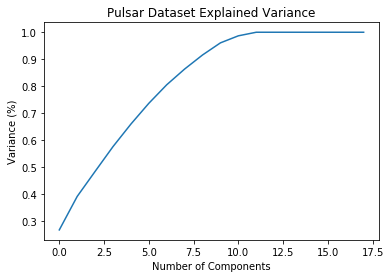

In [9]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Bankruptcy Dataset Explained Variance')
plt.show()

In [10]:
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(X_train)
PCdf = pd.DataFrame(principalComponents)
PCdf.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.104169,0.665130,-0.844422,0.505153,-0.637144,1.148632,0.434369,-0.159429,-0.073273,0.012467,-0.230263
1,1.379580,-0.155013,0.543141,0.543288,0.187033,0.039366,-0.587622,-0.331158,0.233476,-0.137317,0.129408
2,0.365247,0.284666,0.335125,0.080263,-1.006332,-0.363860,0.933137,-0.682496,0.583842,0.222010,0.549292
3,-1.251697,-0.408206,0.872722,0.706244,0.475422,0.635536,0.889414,-0.260908,0.215860,0.199575,-0.240160
4,-0.925465,-0.456425,-0.001504,0.472180,1.462773,0.329419,-0.163005,-0.196816,0.013315,-0.685480,-0.025149


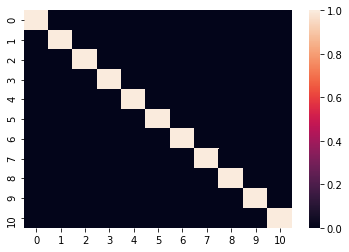

In [11]:
sns.heatmap(PCdf.corr())

In [12]:
 from sklearn.cluster import KMeans

# Let us check optimal number of clusters-


cluster_range = range( 1, 15)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(PCdf)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,766.965557
1,2,581.996485
2,3,524.107766
3,4,487.936487
4,5,452.989949
5,6,422.487865
6,7,409.592265
7,8,383.453905
8,9,357.657565
9,10,347.077429


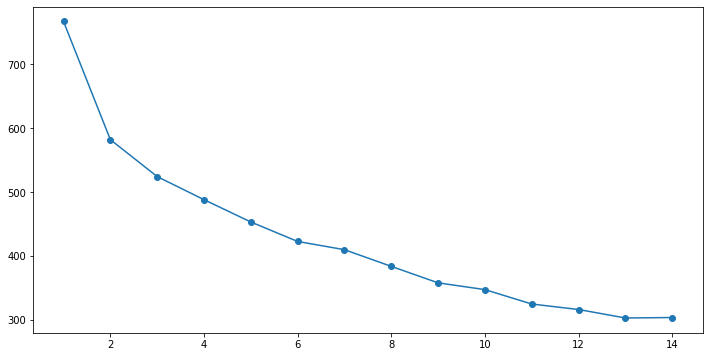

In [13]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

For n_clusters = 2 The average silhouette_score is : 0.229851946759627


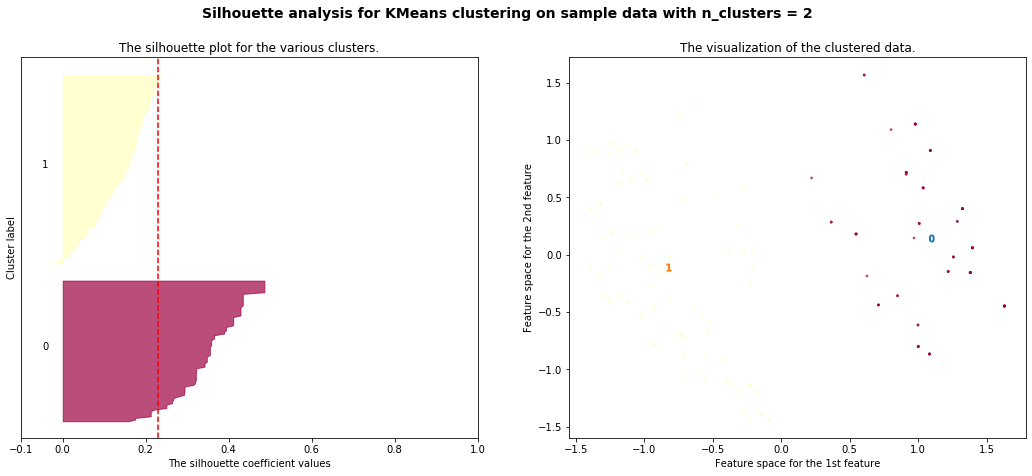

For n_clusters = 3 The average silhouette_score is : 0.21404584953669292


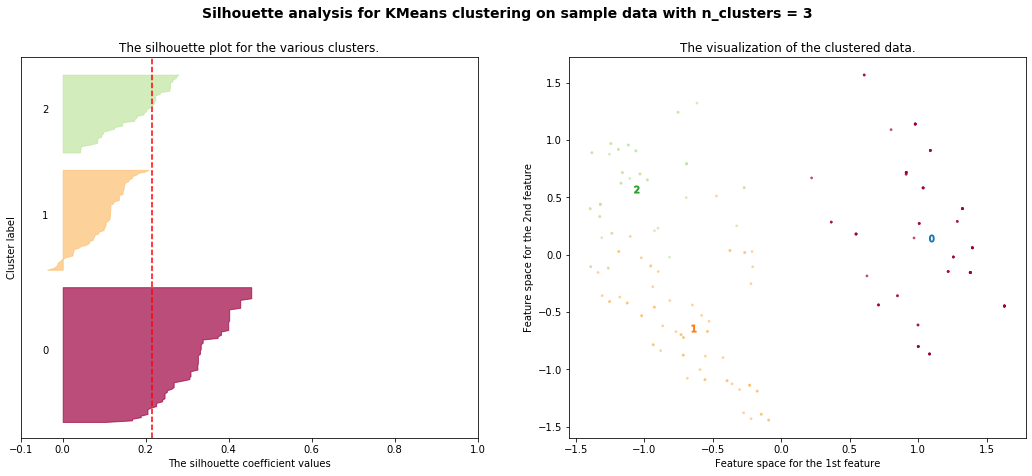

For n_clusters = 4 The average silhouette_score is : 0.2162697682560541


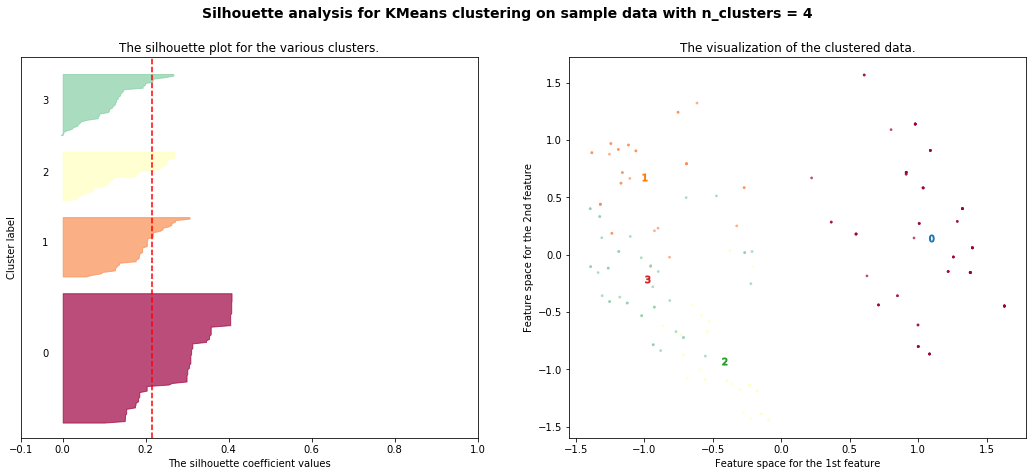

For n_clusters = 5 The average silhouette_score is : 0.1751989547361626


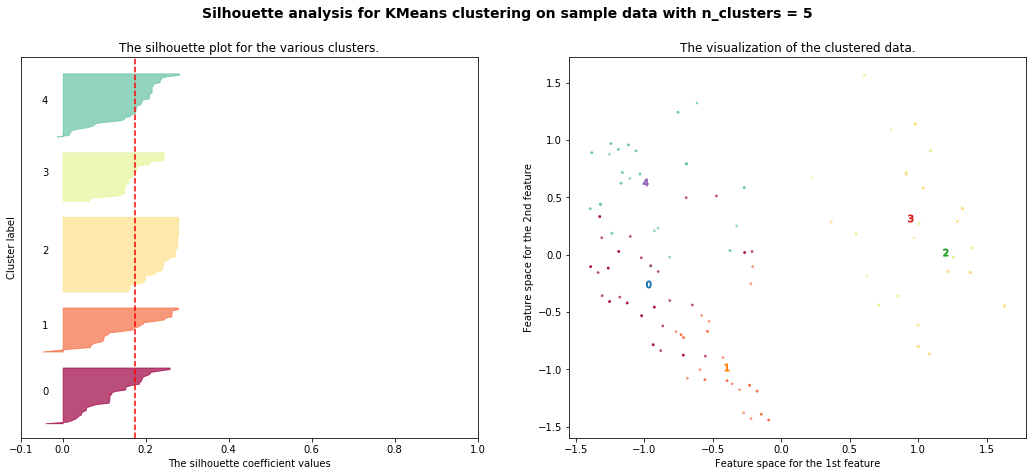

For n_clusters = 6 The average silhouette_score is : 0.1719421175541175


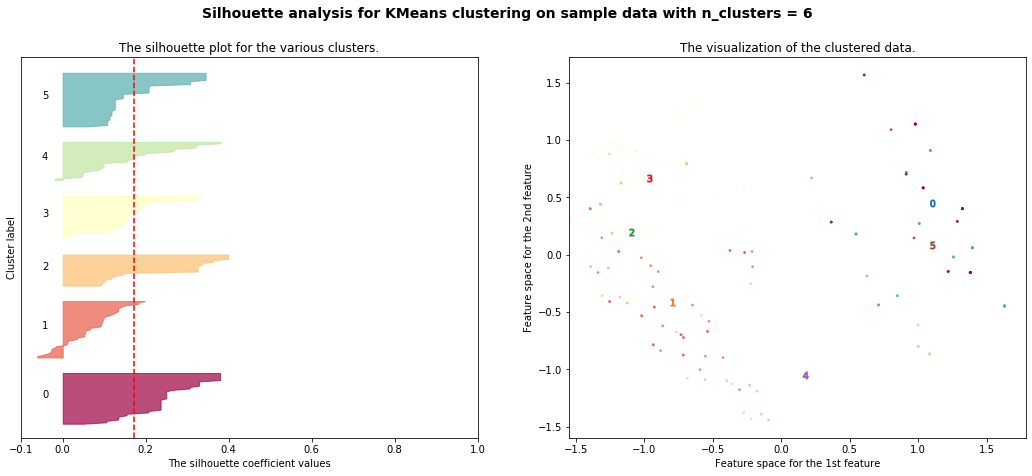

For n_clusters = 7 The average silhouette_score is : 0.19218155549854937


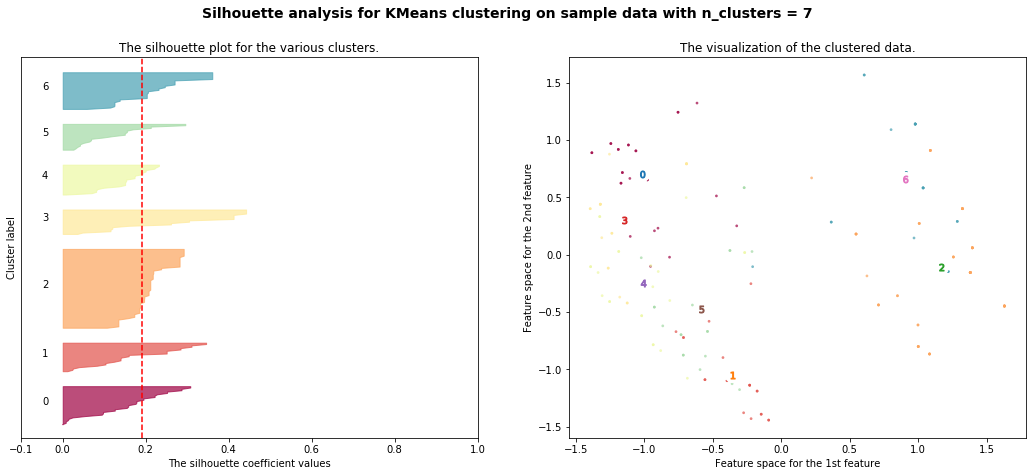

For n_clusters = 8 The average silhouette_score is : 0.19212979616082182


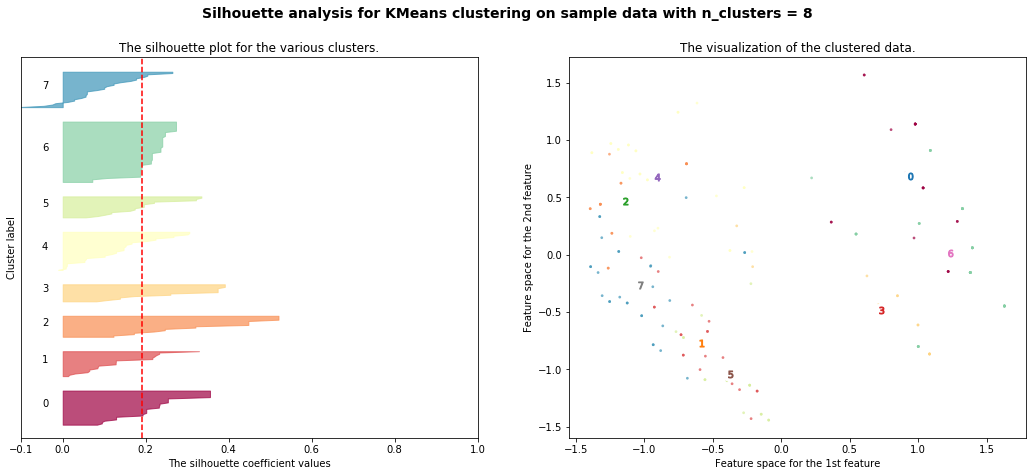

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(PCdf) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(PCdf)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(PCdf, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(PCdf, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(principalComponents[:, 0], principalComponents[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
               marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [30]:
#Now form clusters out of the train data
# Number of clusters

kmeans = KMeans(n_clusters=2, random_state=5)

# Fitting the input data

kmeans = kmeans.fit(PCdf)

# Getting the cluster labels

labels = kmeans.predict(PCdf)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

print("labels", labels)

Centroid values
sklearn
[[-0.82562282 -0.10678856 -0.05751009  0.00731184 -0.00782456 -0.001507
  -0.02404309 -0.01234978 -0.01582496 -0.01473861  0.00330179]
 [ 1.09443026  0.14155693  0.07623431 -0.00969244  0.01037209  0.00199765
   0.03187107  0.01637064  0.02097728  0.01953722 -0.00437679]]
labels [0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0
 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0]


In [31]:
#taking all cluster labels into clust_arr numpy arr
print("Before: ", principalComponents.shape)
principalComponentsNew = np.column_stack((principalComponents, labels))
print("After: ", principalComponentsNew.shape)

Before:  (200, 11)
After:  (200, 12)


In [32]:
principalComponentsTest = pca.fit_transform(X_test)
print(principalComponentsTest.shape)

(50, 11)


In [19]:
#use the same Kmeans object which was used for train data

kmeans = kmeans.fit(principalComponentsTest)

# Getting the cluster labels for the test data and storing it in labels_test
labels_test = kmeans.predict(principalComponentsTest)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

print("labels_test", labels_test)

Centroid values
sklearn
[[-1.17849245 -0.04103478 -0.19696435 -0.04977673  0.00163458 -0.03102113
  -0.00552549 -0.05090847  0.00629913 -0.03581108  0.02635866]
 [ 0.59932236  0.35257772  0.60333824  0.25497089  0.00196994  0.00460442
  -0.01672042  0.01216304  0.00652207  0.06686103  0.01273101]
 [ 1.26913992 -0.49860622 -0.6112579  -0.32219678 -0.00634411  0.05168767
   0.03790934  0.07728574 -0.02269809 -0.04104236 -0.07115363]]
labels_test [1 2 1 1 1 0 0 0 2 1 0 0 0 0 1 0 0 1 0 1 0 1 2 1 0 1 1 2 1 1 0 2 2 0 2 2 1
 0 0 0 2 1 2 0 0 1 0 1 0 2]


In [33]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
# check the accuracy on the training set
print("svc_model score train : ",svc_model.score(X_train, y_train))
print("svc_model score test : ",svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

svc_model.fit(pca.transform(X_train), y_train)
prediction = svc_model.predict(pca.transform(X_test))
print("svc_model score train using pca: ",svc_model.score(pca.transform(X_train), y_train))
print("svc_model score test using pca: ",svc_model.score(pca.transform(X_test), y_test))

# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)
print("svc_model score train : ",svc_model.score(X_train, y_train))
print("svc_model score test : ",svc_model.score(X_test, y_test))

svc_model.fit(pca.transform(X_train), y_train)
prediction = svc_model.predict(pca.transform(X_test))
print("svc_model score train using pca: ",svc_model.score(pca.transform(X_train), y_train))
print("svc_model score test using pca: ",svc_model.score(pca.transform(X_test), y_test))

# Building a Support Vector Machine on train data
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)
print("svc_model score train : ",svc_model.score(X_train, y_train))
print("svc_model score test : ", svc_model.score(X_test, y_test))

svc_model.fit(pca.transform(X_train), y_train)
prediction = svc_model.predict(pca.transform(X_test))
print("svc_model score train using pca: ",svc_model.score(pca.transform(X_train), y_train))
print("svc_model score test using pca: ",svc_model.score(pca.transform(X_test), y_test))

svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

print("svc_model score train : ",svc_model.score(X_train, y_train))
print("svc_model score test : ",svc_model.score(X_test, y_test))

svc_model.fit(pca.transform(X_train), y_train)
prediction = svc_model.predict(pca.transform(X_test))
print("svc_model score train using pca: ",svc_model.score(pca.transform(X_train), y_train))
print("svc_model score test using pca: ",svc_model.score(pca.transform(X_test), y_test))

svc_model score train :  1.0
svc_model score test :  1.0
Confusion Matrix:
 [[29  0]
 [ 0 21]]
svc_model score train using pca:  0.99
svc_model score test using pca:  1.0
svc_model score train :  1.0
svc_model score test :  1.0
svc_model score train using pca:  0.995
svc_model score test using pca:  1.0
svc_model score train :  0.92
svc_model score test :  0.88
svc_model score train using pca:  0.88
svc_model score test using pca:  0.9
svc_model score train :  0.98
svc_model score test :  1.0
svc_model score train using pca:  0.99
svc_model score test using pca:  1.0


/Users/ahmedshadab/Documents/machine_learning/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ahmedshadab/Documents/machine_learning/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ahmedshadab/Documents/machine_learning/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warni